## 랜덤 포레스트 모델 예제(회귀 모델과 성능 비교)

랜덤 포레스트 - MSE: 28.59, R2: 0.66
Linear Regression - MSE: 36.34, R2: 0.57
Decision Tree - MSE: 27.30, R2: 0.68

최적 모델: Decision Tree


c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\NEWTEST\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


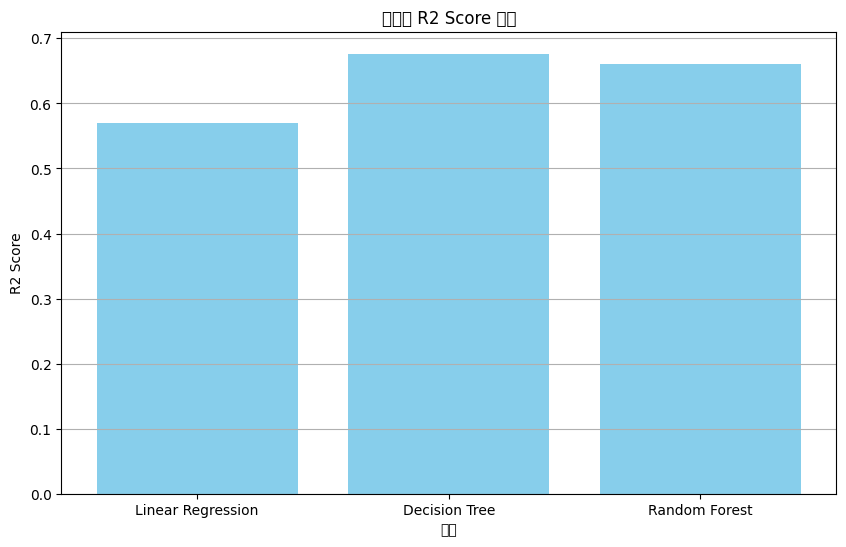

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('dataset/HousingData.csv')

# 데이터 전처리
data = data.dropna()  # 결측값 제거
X = data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

# 2. 다른 모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}
best_model = max(results, key=lambda x: results[x]['R2'])
print("\n최적 모델:", best_model)

# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()
# 의사결정나무의 점수가 제일 높음

In [2]:
# 4. 랜덤 포레스트 하이퍼파라미터 튜닝 (옵션)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("\n최적 하이퍼파라미터:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)

# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = r2_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - MSE: {tuned_rf_mse:.2f}, R2: {tuned_rf_r2:.2f}")


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
튜닝된 랜덤 포레스트 - MSE: 28.63, R2: 0.66


## streamlit를 활용한 당뇨병 예측

In [4]:
%pip install streamlit

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.7 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.7 MB 11.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.7 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 10.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.3 MB 11.2 MB/s eta 0:00:03
   ------- -------------------------------- 4.7/25.3 MB 11.4 MB/s eta 0:00:02
   ----------- ---------------------------- 7.3/25.3 MB 11.6 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/25.3 MB 11.6 MB/s eta 0:00:02
   ----------

In [1]:
# 사전설치 : pip install streamlit
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib # 머신러닝 내용을 저장하고, 재호출시에 사용
import streamlit as st
import matplotlib as plt

# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 1. 데이터 로드 및 전처리
data = pd.read_csv('dataset/diabetes.csv')

# 선택된 feature만 사용
selected_features = ['Glucose', 'BMI', 'Age']
X = data[selected_features]
y = data['Outcome']  # 예측할 대상

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 랜덤포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 모델 저장
joblib.dump(model, 'diabetes_model.pkl')

# 테스트 데이터로 정확도 확인
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# 3. Streamlit 앱
st.title('당뇨병 예측 시스템')
st.write('Glucose, BMI, Age 값을 입력하여 당뇨병 예측을 해보세요.')

# 사용자 입력받기
glucose = st.slider('Glucose (혈당 수치)', min_value=0, max_value=200, value=100)
bmi = st.slider('BMI (체질량지수)', min_value=0.0, max_value=50.0, value=25.0, step=0.1)
age = st.slider('Age (나이)', min_value=0, max_value=100, value=30)

# 예측하기 버튼
if st.button('예측하기'):
    # 입력값을 모델에 전달
    model = joblib.load('diabetes_model.pkl')
    input_data = np.array([[glucose, bmi, age]])
    prediction = model.predict(input_data)[0]

    # 결과 출력
    if prediction == 1:
        st.write('예측 결과: 당뇨병 가능성이 높습니다.')
    else:
        st.write('예측 결과: 당뇨병 가능성이 낮습니다.')

2025-03-17 15:42:04.497 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Model Accuracy: 73.38%


2025-03-17 15:42:05.016 
  command:

    streamlit run c:\NEWTEST\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-17 15:42:05.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-17 15:42:05.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare 